In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('smoke_detection_iot.csv')
df.sample(5)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
22086,22086,1654755417,-14.161,50.44,1316,400,12974,19397,938.700,1.77,1.84,12.20,1.902,0.043,22086,1
50836,50836,1654903853,38.650,14.12,348,4397,12307,20235,930.873,1.28,1.33,8.79,1.370,0.031,848,1
60182,60182,1655127604,16.017,45.10,211,433,12761,20508,937.390,1.79,1.86,12.31,1.920,0.043,3296,0
35276,35276,1654771625,24.820,53.51,864,680,12794,19520,939.074,2.13,2.21,14.63,2.281,0.052,10282,1
51053,51053,1654904070,34.310,16.68,0,826,13115,20843,930.904,0.89,0.93,6.14,0.957,0.022,1065,1


In [3]:
df.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [4]:
duplicates = df[df.duplicated(keep = False)]
duplicates

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm


In [5]:
df = df.drop(['Unnamed: 0','UTC','CNT'], axis = 1)

In [6]:
df.sample(5)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
36948,26.680,47.91,1097,593,12819,19459,939.048,2.36,2.45,16.23,2.531,0.057,1
26911,17.500,48.13,94,400,13105,19970,939.606,0.66,0.69,4.55,0.709,0.016,0
38189,24.520,53.10,1084,531,12837,19454,938.877,1.95,2.03,13.42,2.092,0.047,1
1936,23.093,53.61,76,400,13115,19980,939.605,0.69,0.71,4.73,0.737,0.017,0
21936,-12.071,51.12,1383,420,12953,19383,938.744,1.98,2.06,13.64,2.127,0.048,1


In [7]:
column_means = df.mean()
column_std = df.std()
z_score = pd.DataFrame()
for i in df.columns:
    z_score[i] = (df[i]-column_means[i])/column_std[i]
    
z_score

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,0.280619,0.994939,-0.248612,-0.141677,-2.335917,-2.024990,0.831754,-0.109042,-0.093340,-0.115214,-0.091923,-0.073888,-1.582444
1,0.281664,0.917108,-0.248612,-0.141677,-2.192779,-1.810064,0.838514,-0.109042,-0.093340,-0.115214,-0.091923,-0.073888,-1.582444
2,0.282639,0.837021,-0.248612,-0.141677,-2.086343,-1.624670,0.834008,-0.109042,-0.093340,-0.115214,-0.091923,-0.073888,-1.582444
3,0.283684,0.760318,-0.248612,-0.141677,-2.027619,-1.485215,0.832505,-0.109042,-0.093340,-0.115214,-0.091923,-0.073888,-1.582444
4,0.284728,0.693767,-0.248612,-0.141677,-1.979907,-1.367088,0.838514,-0.109042,-0.093340,-0.115214,-0.091923,-0.073888,-1.582444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,0.171842,-3.694094,-0.168603,-0.141677,2.864764,1.336710,-1.470431,-0.108360,-0.093011,-0.114201,-0.091620,-0.073874,-1.582444
62626,0.186814,-3.685070,-0.170267,-0.141677,2.894126,1.367882,-1.464422,-0.108381,-0.093021,-0.114234,-0.091629,-0.073874,-1.582444
62627,0.201717,-3.688454,-0.168347,-0.141677,2.872105,1.358038,-1.457662,-0.108425,-0.093036,-0.114288,-0.091645,-0.073875,-1.582444
62628,0.216760,-3.665894,-0.166939,-0.141677,2.824392,1.331788,-1.462920,-0.108425,-0.093041,-0.114295,-0.091648,-0.073875,-1.582444


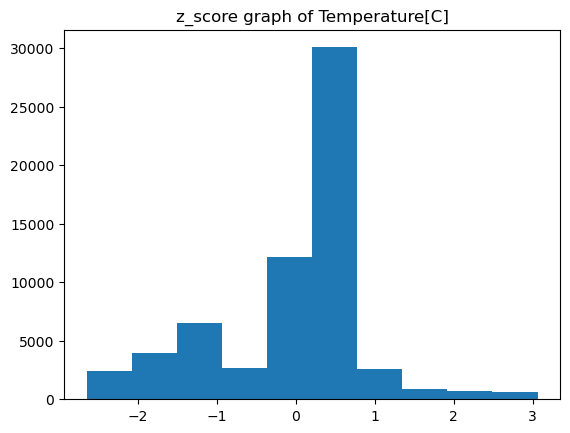

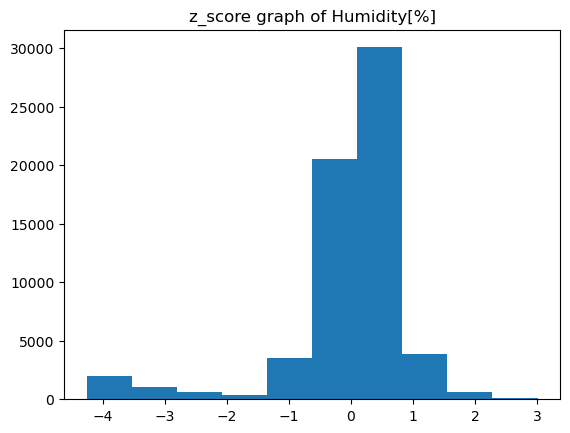

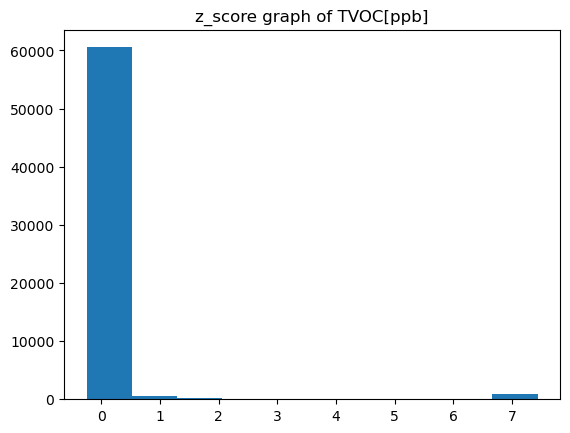

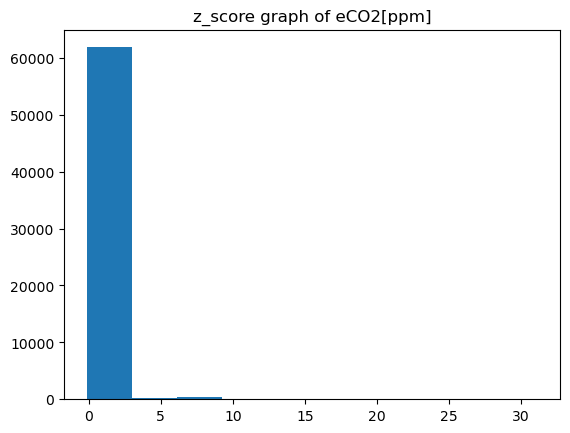

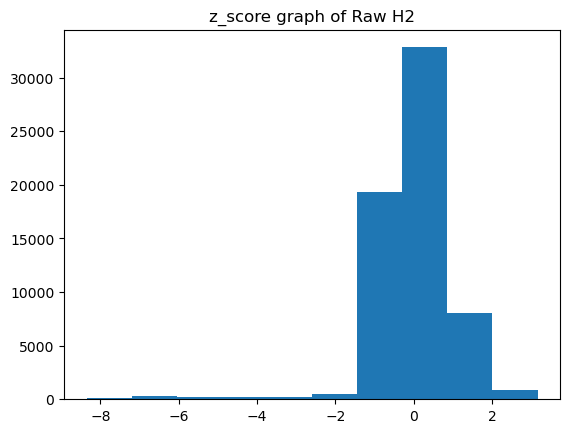

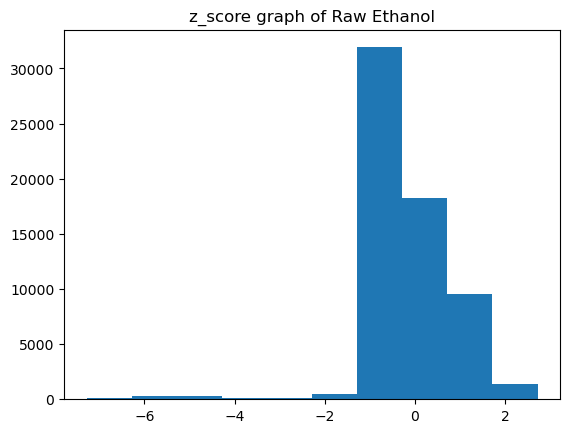

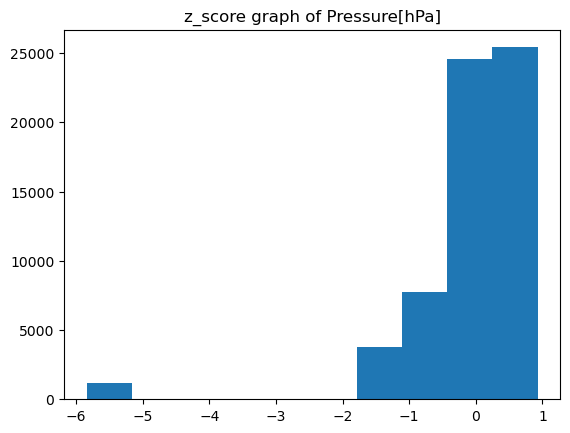

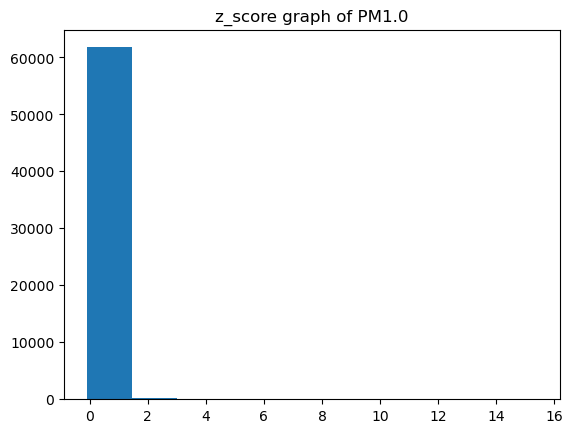

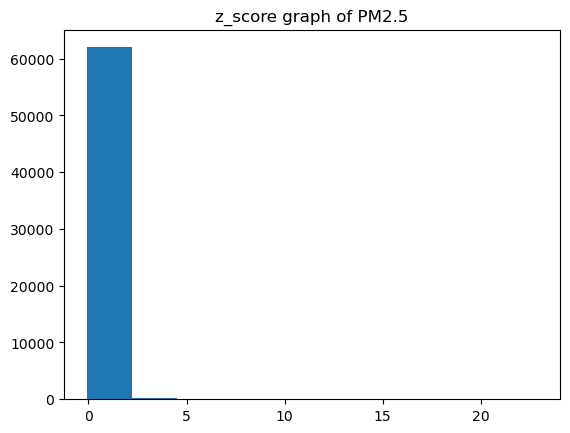

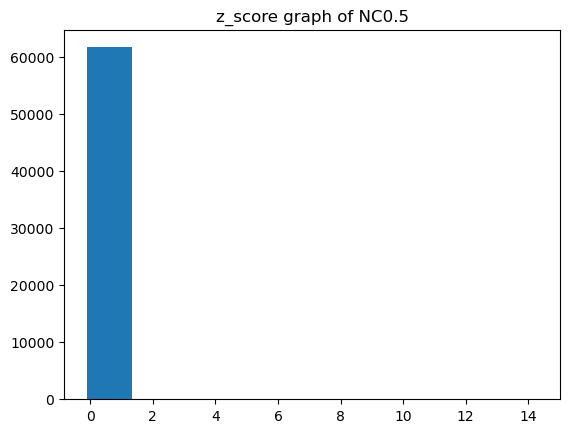

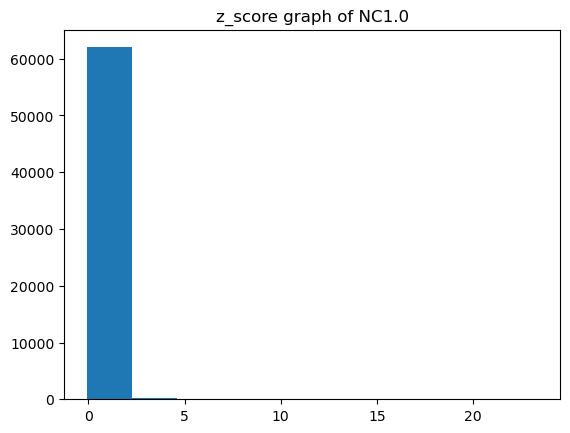

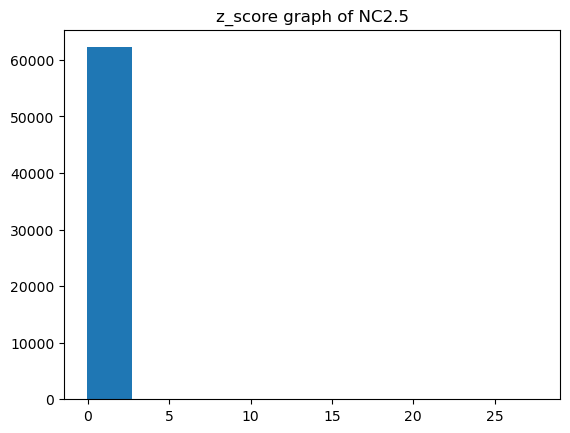

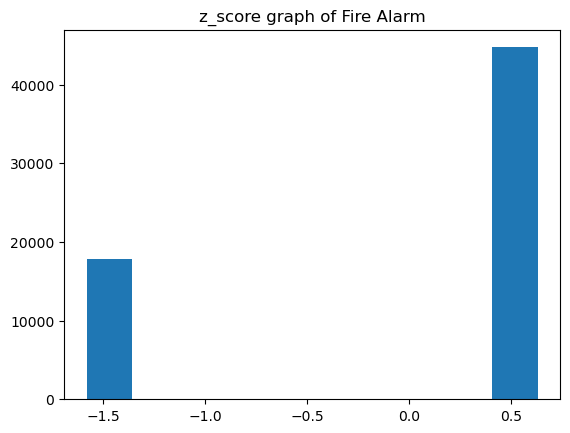

In [8]:
for column in z_score.columns:
    plt.hist(z_score[column])
    plt.title('z_score graph of '+column)
    plt.show()

In [9]:
correlation = df.corr()
correlation

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.097006
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,0.107007
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.110552
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.084916
NC0.5,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.128118


<Axes: >

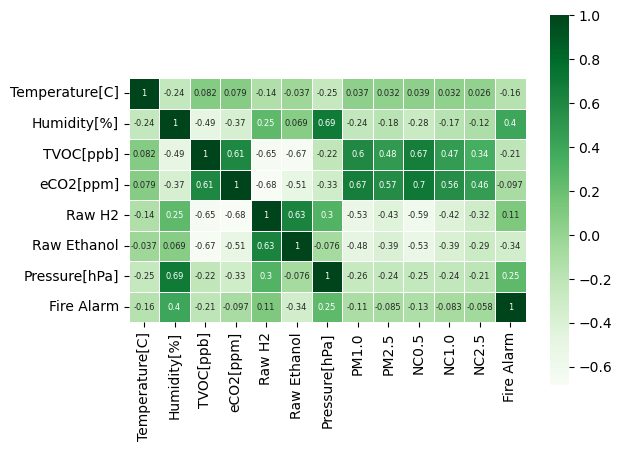

In [10]:
sns.heatmap(correlation.drop(['PM1.0','PM2.5','NC0.5','NC1.0','NC2.5']), cmap = 'Greens', annot = True, square=True, linewidths=.5, annot_kws={"size": 6})

In [11]:
df = df.drop_duplicates()

In [12]:
x = df.iloc[:,:-1].copy()
x.sample(3)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
25311,11.67,52.85,27,400,12659,19704,939.787,0.05,0.07,0.29,0.079,0.022
45498,24.69,52.57,1253,400,12954,19416,938.752,2.14,2.22,14.74,2.298,0.052
32817,20.63,51.39,290,400,13122,19975,939.411,0.33,0.34,2.28,0.356,0.008


In [13]:
y = df['Fire Alarm']
y.sample(3)

58862    0
54156    0
50788    1
Name: Fire Alarm, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [15]:
print({'x_train':len(x_train),'x_test':len(x_test)})

{'x_train': 50102, 'x_test': 12526}


In [16]:
df['Fire Alarm'].value_counts()

1    44757
0    17871
Name: Fire Alarm, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [18]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
y_pred = rfc.predict(x_test)
classificationReport = classification_report(y_test,y_pred)
print(classificationReport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3571
           1       1.00      1.00      1.00      8955

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3570,    1],
       [   0, 8955]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9999201660546064

In [22]:
rfc = RandomForestClassifier(class_weight = 'balanced')

In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 12, sampling_strategy = 1.0)
x_smote, y_smote = sm.fit_resample(x_train, y_train)
rfc.fit(x_smote,y_smote)

RandomForestClassifier(class_weight='balanced')

In [24]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
y_smote_pred = rfc.predict(x_test)

In [27]:
accuracy_score(y_test,y_smote_pred)

0.9998403321092129

In [30]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_smote,y_smote)

C:\Users\sachi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
LR_pred = LR.predict(x_test)

In [33]:
accuracy_score(y_test,LR_pred)

0.8923838416094524

In [36]:
import pickle
with open('model_RandomForest','wb') as file:
    pickle.dump(rfc,file)